<center><img src = https://media.istockphoto.com/photos/wildlife-collage-picture-id913630794?s=612x612 width = '300' <center>

## <center> DL assignment <center>
### <center>- Gloria Miori -<center>

## 1. Libraries

Load those libraries needed

In [ ]:
from tensorflow import keras as ks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt
import numpy as np
import time
import datetime

## 2. Model network architecture

Final model asrchitecture description:<br>
Six convolution layers neural network, all with padding and activation function relu. I kept the padding since the edge of the picture can be important for many of them.<br>
After each convolution I do a batch normalization to reduce overfitting.<br>
After 2 convolutions I use MaxPooling.<br>
I use an increase Dropout to reduce overfitting (0.2,0.3,0.4) since the number of neurons is as well increasing.<br>
All of this followed by a flatten layer and then different dense layers reducing the number of nodes to arrive at the final 10 nodes output dense layer (10 classes) with Softmax activation:

In [ ]:

model = ks.Sequential()

model.add(ks.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.3))

model.add(ks.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.4))

model.add(ks.layers.Flatten()) # when exiting the Convolution, you have to do a Flatten, because FullDense layers expect arrays, not matrices
model.add(ks.layers.Dense(128, activation='relu'))
model.add(ks.layers.Dense(64, activation='relu'))
model.add(ks.layers.Dense(10, activation='softmax'))

Summary of the model architecture: **.Summary()** method of the model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

## 3. Optimizer, error function


Select the optimizer: 'adam', with default values.<br>
To improve fitting of the model I could have tried different learning rate.<br>
To use data augmentation I had to change the loss function to 'categorical_crossentropy'

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 4. Preparing the data

We load the CIFAR10 data from the datasets directly from the Keras libraries. These are already ready in train and test

**Important detail:**
> The neural network requires that the inputs be real numbers, and we will do it by forcing the division of the values ​​within the 32x32 matrices (which have values​​ from 0 to 255) by 255.0 (a real)

In [ ]:
cifar10 = ks.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
y_train_label = y_train
y_test_label = y_test
y_test = ks.utils.to_categorical(y_test)
y_train = ks.utils.to_categorical(y_train)

y_test
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

We obtain an array with all the labels of CIFAR10

In [ ]:
cifar10_labels = [
'airplane', # id 0
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck',
]

print('Number of labels: %s' % len(cifar10_labels))

Number of labels: 10


Let's paint a sample of the images from the CIFAR10 dataset, to see if it looks anything like what we expect.
First, we see what types of data I have, then we map those arrays in a grayscale using the **. Get_cmap ()** method of PlotLy with the first nine numbers of the dataset.

Train: X=(50000, 32, 32, 3), y=(50000, 10)
Test: X=(10000, 32, 32, 3), y=(10000, 10)


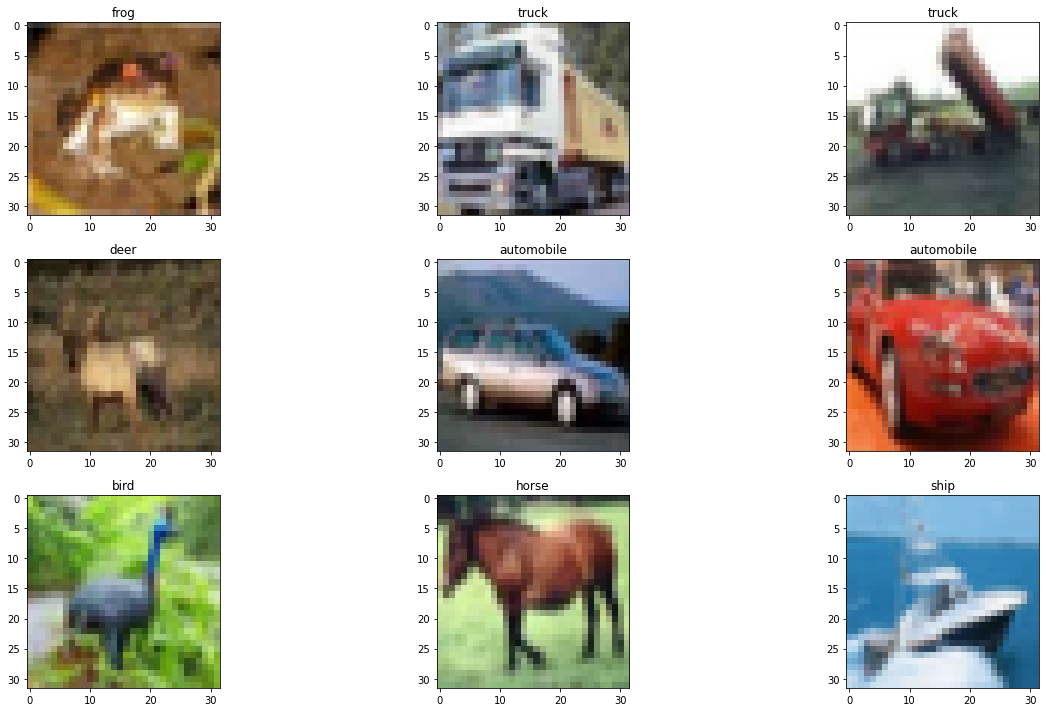

In [ ]:
# Lets paint a sample of the images of CIFAR10

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

plt.figure(figsize=(20, 10))
for i in range(9):

    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(cifar10_labels[y_train_label[i,0]])

plt.subplots_adjust(hspace = 1)
plt.tight_layout()
plt.show()

We are we going to want to validate while we train (very practical)

In [ ]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]


When we add convolutions, we need to "pre-treat the data", because **the convolution expects an array of 4 fields** (more like "images"), in the case of MNIST. CIFAR10 already has the right shape, so we don't have to do anything, but as we always say: you better check its size.

Therefore, when exiting the Convolution, you have to do a Flatten, because FullDense layers expect arrays, not matrices !!

Then we print it to see that everything is correct

In [ ]:
# We validate the result
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 10)
Test: X=(10000, 32, 32, 3), y=(10000, 10)
Validation: X=(10000, 32, 32, 3), y=(10000, 10)


## 5. Data augmentation

In [ ]:
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)

Print a sample of 9 images where applied data augmentation from 1 randomly selected image within the training set

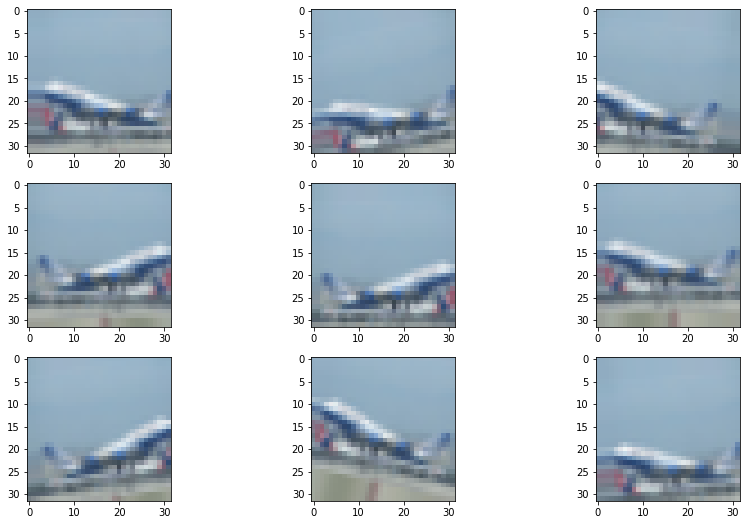

In [ ]:
import random
sample = random.choice(range(0,len(x_train)))

example_generator = datagen.flow(
    x_train[sample:sample+1],
    y_train_label[sample:sample+1],
    batch_size=1
)

plt.figure(figsize=(12, 12))
for i in range(0,9):
    plt.subplot(5, 3, i+1)
    for X,y in example_generator:
        image = X[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

## 6. Training

This model is trained with EarlyStopping so I leave the max epoch to a big number (150).<br>
I choose these EarlyStopping parameters after having run the model multiple times for all the epochs and found in these parameters the "sweet spot" to prevent overfitting (the curves start to diverge) but not being underfitting

In [ ]:
t = time.perf_counter()

In [ ]:
#training

callback_val_loss = EarlyStopping(monitor="val_loss", mode = 'min', patience=15, min_delta = 0.01)

history = model.fit(datagen.flow(x_train, y_train, batch_size=516),
                    epochs=150,validation_data=(x_val,y_val),
                    callbacks =callback_val_loss)

Epoch 1/150
78/78 [==============================] - 22s 231ms/step - loss: 1.8593 - accuracy: 0.3436 - val_loss: 2.8395 - val_accuracy: 0.0997
Epoch 2/150
78/78 [==============================] - 17s 218ms/step - loss: 1.4206 - accuracy: 0.4847 - val_loss: 3.1402 - val_accuracy: 0.1027
Epoch 3/150
78/78 [==============================] - 17s 219ms/step - loss: 1.2457 - accuracy: 0.5519 - val_loss: 3.2218 - val_accuracy: 0.1276
Epoch 4/150
78/78 [==============================] - 17s 224ms/step - loss: 1.1317 - accuracy: 0.5941 - val_loss: 3.2754 - val_accuracy: 0.1903
Epoch 5/150
78/78 [==============================] - 17s 219ms/step - loss: 1.0462 - accuracy: 0.6269 - val_loss: 1.8706 - val_accuracy: 0.4161
Epoch 6/150
78/78 [==============================] - 17s 215ms/step - loss: 0.9710 - accuracy: 0.6562 - val_loss: 1.2838 - val_accuracy: 0.5691
Epoch 7/150
78/78 [==============================] - 17s 218ms/step - loss: 0.9099 - accuracy: 0.6757 - val_loss: 1.0702 - val_accuracy:

It stopped after 67 epochs

In [ ]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Training time:', elapsed_time)

Training time: 0:45:58.433268


## 7. Evaluate the results

Let's obtain a graph of how the error and the accuracy evolve in each epoch in the training data and in the validation

In [ ]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 85.420


Improved values compared to previous models for the test results

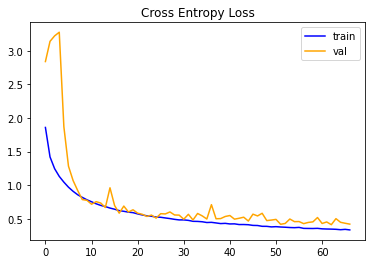

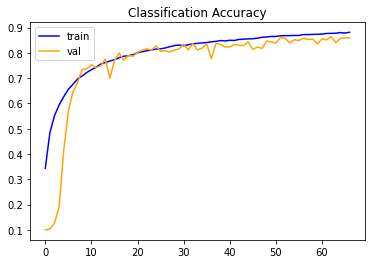

In [ ]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

It seems that the model with Data Augmentation and these EarlyStopping parameters is a good compromise within overfitting the training data and underfitting.

Let's see what kind of predictions I'm getting about the test set (let's paint the images and their classifications)

In [ ]:
predictions = model.predict(x_test)

Paint some test images, their label (ground truth) and the classifications that we have made.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label[0]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

We draw the first images, with the predictions and their real values ​​(a total of 20 images, so as not to abuse your laptops)

We color the correct predictions in blue and the failures in red. Although I have printed the labels first so that we have a reference to the graphic.

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


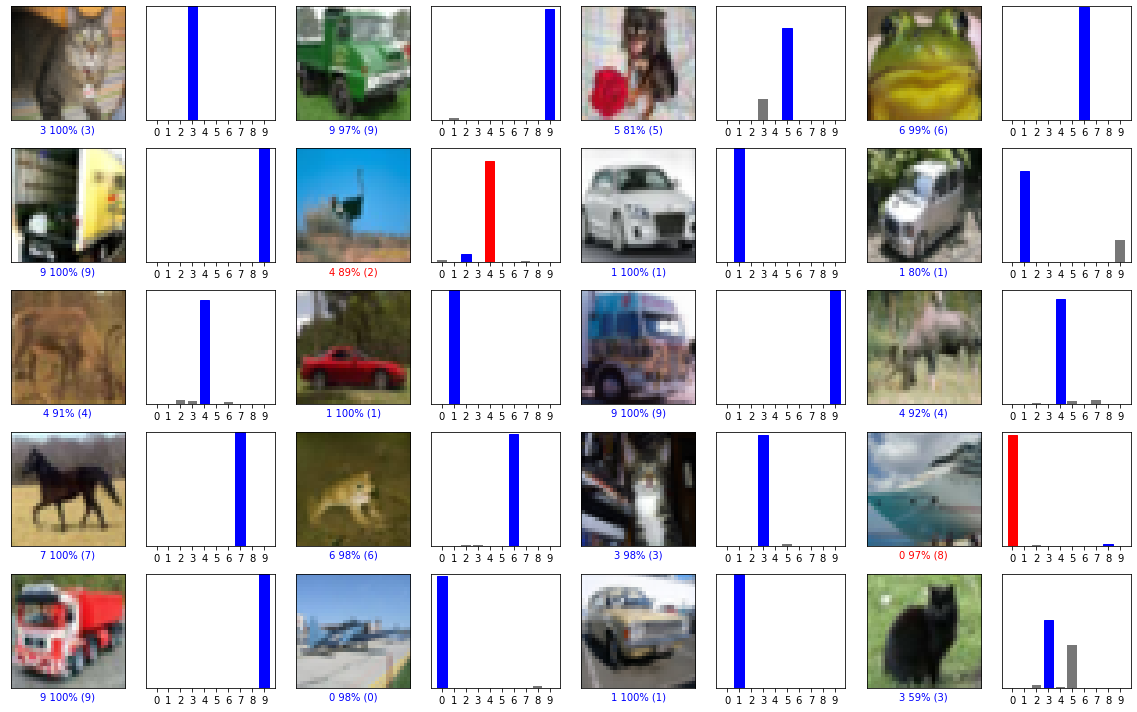

In [ ]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, predictions[i+start], y_test_label, x_test) #y_test_label needed to print correctly
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, predictions[i+start], y_test_label)
plt.tight_layout()
plt.show()

## 8. Save the model for future evaluations

Go changing the names of the file to save the various projects.
Here we save it in "local", but remember that the ideal is that you save it in Google Drive (you have to mount the unit, set the path and save the .h5 model there)

In [ ]:
model.save('cifar10_model_DL_assignment_Gloria_Miori.h5')